# Homework 4 
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17

## Problem 1

We learned this week that the posterior pdf for $b$, the tail probability when
flipping a coin, with a flat prior in the range 0-1, is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$
where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

Get a coin, flip it 8 times and record the results.

a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 


## Problem 2

Fit polynomials of up to the 5th order to the provided dataset.
Use BIC to find the best model for this dataset.

## Problem 3 

Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. 
Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) 
uniform bin width histogram. 


<br>
# Homework 4: Solutions

### Some useful definitions and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.datasets import fetch_LINEAR_geneva
from astroML.plotting import setup_text_plots
from astroML.plotting import hist
import seaborn as sns # set default plot styles
setup_text_plots(fontsize=8, usetex=True)

## Problem 1: the coin flip

In [2]:
from scipy.stats import norm
np.random.seed(42)
# results for my coin (0:head, 1: tail)
flipData = [0, 0, 1, 1, 0, 1, 0, 1]

Here is an example of a solution to Problem 1:
![HW4](figures/HW4-binomial.tiff) 

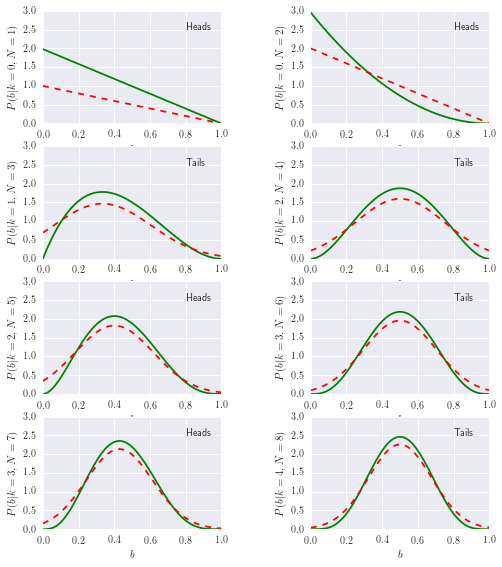

P(b<0.25|k,N) = 0.0811074947907


In [27]:
sns.set(style="darkgrid", palette="Set2")

b = np.linspace(0,1,100)
db = b[1] - b[0]
tails = 0
tossNum = 0
b_0 = 0

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(wspace = 0.5, bottom = 0)

for toss in range(len(flipData)):
    h_or_t = ""
    if flipData[toss] == 1:
        tails += 1
        h_or_t = "Tails"
    else:
        h_or_t = "Heads"
    tossNum += 1
    b_0 = 1.0 * tails / tossNum  # Maximum Posterior
    plt_num = int(str(len(flipData)/2) + "2" + str(tossNum))
    
    # Calculate the posterior probability
    probB = b ** tails * (1.0 - b) ** (tossNum - tails)  # Equation 5.71
    probB /= probB.sum() # Normalize
    probB /= db 

    # Calculate the plot number
    plt_num = int(str(len(flipData)/2) + "2" + str(tossNum))
    
    # Calculate the gaussian distribution
    sigmaB = np.sqrt((b_0 * (1 - b_0)) / float(tossNum)) # Equation 5.72
    prob_gauss = norm(1.0 * tails / tossNum, sigmaB).pdf(b)
    if b_0 == 0:
        prob_gauss = (-1.0 * tossNum) * b + tossNum
        
    if tossNum == 8:  # 
        percent = np.percentile(probB, 25)
    
    # Plot the distributions
    ax = fig.add_subplot(plt_num)
    ax.plot(b, probB, '-g', label='probB')
    ax.plot(b, prob_gauss, '--r', label='gaussian dist')
    ax.set_xlim(0.0, 1.0, 0.2)
    ax.set_ylim(0.0, 3.0, 0.5)
    ax.set_xlabel('$b$')
    ax.set_ylabel('$P(b|k = ' + str(tails) + ',N = ' + str(tossNum) + ')$')
    ax.text(0.8, 2.5, h_or_t, fontsize=10)
plt.show()
print 'P(b<0.25|k,N) =', percent

## Problem 2: use BIC to find the best polynomial model for a given dataset

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
sns.set(style="darkgrid", palette="Set2")
# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, x, y, sigma_y, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, x, y, sigma_y, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, x, y, sigma_y, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

In [5]:
# generate (noisy) data
np.random.seed(0)
Ndata = 22
x = np.linspace(0, 3, Ndata)[1:-1]
sigma_y = 0.1 + 0*x
y = np.random.normal(np.sin(x) * x, sigma_y) 


CHI2:
   best linear model: 349.659135137
   best quadratic model: 99.3313525184
   best cubic model: 10.1820964978
   best quartic model: 10.0904931553
   best quintic model: 9.7536014306
Bayesian Information Criterion (BIC):
   linear model BIC: 202.502498764
   quadratic model BIC: 77.338607455
   cubic model BIC: 32.7639794447
   quartic model BIC: 32.7181777734
   quintic model BIC: 32.5497319111


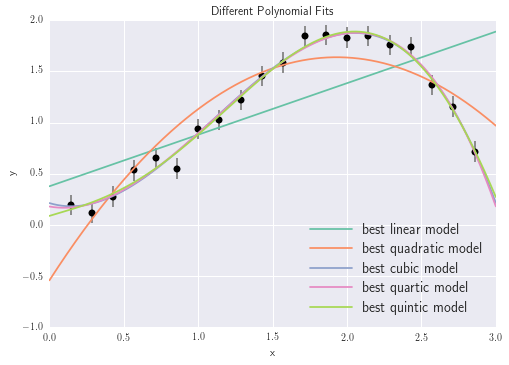

In [6]:
# Create Thetas for each dimensional fit
theta1 = best_theta(1, x, y, sigma_y)
theta2 = best_theta(2, x, y, sigma_y)
theta3 = best_theta(3, x, y, sigma_y)
theta4 = best_theta(4, x, y, sigma_y)
theta5 = best_theta(5, x, y, sigma_y)

# Create fits for each dimensional using the xfit and the thetas
xfit = np.linspace(0, 3, 1000)
yfit1 = polynomial_fit(theta1, xfit)
yfit2 = polynomial_fit(theta2, xfit)
yfit3 = polynomial_fit(theta3, xfit)
yfit4 = polynomial_fit(theta4, xfit)
yfit5 = polynomial_fit(theta5, xfit)

# Calculate the chi^2 for each fit
chi21 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chi22 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chi23 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
chi24 = np.sum(((y-polynomial_fit(theta4, x))/sigma_y)**2) 
chi25 = np.sum(((y-polynomial_fit(theta5, x))/sigma_y)**2) 

# Calculate the Bayesian Information Criterion (BIC) by BIC = chi^2 + klog(N)
BIC1 = chi21 + 1 * logL(theta1, x, y, sigma_y)
BIC2 = chi22 + 1 * logL(theta2, x, y, sigma_y)
BIC3 = chi23 + 1 * logL(theta3, x, y, sigma_y)
BIC4 = chi24 + 1 * logL(theta4, x, y, sigma_y)
BIC5 = chi25 + 1 * logL(theta5, x, y, sigma_y)


print "CHI2:"
print '   best linear model:', chi21
print '   best quadratic model:', chi22
print '   best cubic model:', chi23
print '   best quartic model:', chi24
print '   best quintic model:', chi25
print "Bayesian Information Criterion (BIC):"
print '   linear model BIC:', BIC1
print '   quadratic model BIC:', BIC2
print '   cubic model BIC:', BIC3
print '   quartic model BIC:', BIC4
print '   quintic model BIC:', BIC5

fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model')
ax.plot(xfit, polynomial_fit(theta4, xfit), label='best quartic model')
ax.plot(xfit, polynomial_fit(theta5, xfit), label='best quintic model')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Different Polynomial Fits')

ax.legend(loc='best', fontsize=14)

Here is an example of a solution to Problem 2:
![HW4](figures/HW4-poly.tiff) 

## Problem 3
Compare Bayesian Blocks Algorithm and classsical histogram
on a sample of periodic variable stars.

In [7]:
# fetch data
data = fetch_LINEAR_geneva()
x = data['logP']

Here is an example of a solution to Problem 3:
![HW4](figures/HW4-BB.tiff) 

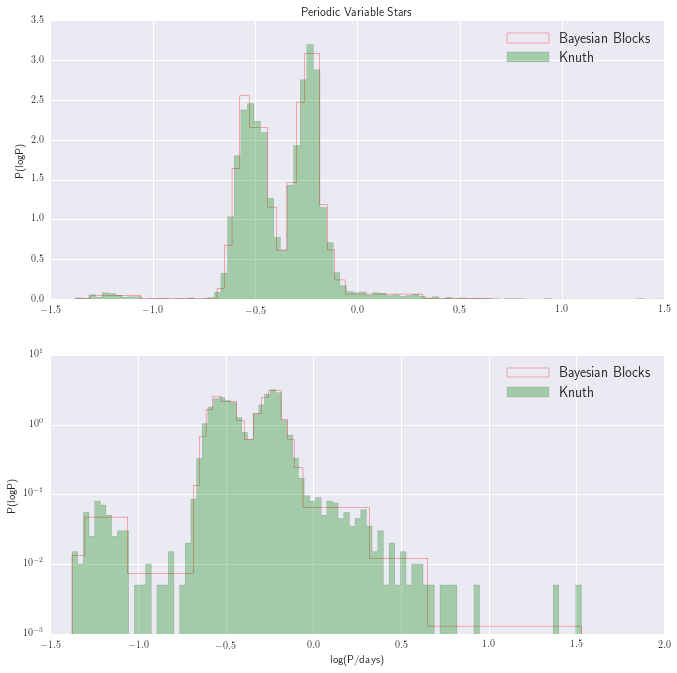

In [8]:
fig = plt.figure(figsize=(11,11))
# Plot the histagrams using Bayesian Blocks and Knuth
ax = fig.add_subplot(211)
hist(x, bins='blocks', normed=True, histtype='step', 
     color='red', alpha = 1.0, label="Bayesian Blocks")
hist(x, bins='knuth', normed=True, histtype='stepfilled', 
     color='green', alpha = 0.3, label="Knuth")
ax.set_ylabel("P(logP)")
ax.set_title("Periodic Variable Stars")
ax.set_xlim(-1.5, 1.0)
ax.set_ylim(0, 3.5)
ax.legend(loc='best', fontsize=14)

# Plot the histagrams, with a log scale, of the data using Bayesian Block and Knuth
ax2 = fig.add_subplot(212, yscale='log')
hist(x, bins='blocks', normed=True, histtype='step', 
     color='red', alpha = 1.0, label="Bayesian Blocks")
hist(x, bins='knuth', normed=True, histtype='stepfilled', 
     color='green', alpha = 0.3, label="Knuth")
ax2.set_xlabel("log(P/days)")
ax2.set_ylabel("P(logP)")
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 3.5)
ax2.legend(loc='best', fontsize=14)

plt.show()